## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


import warnings
warnings.filterwarnings("ignore")

# Set all options
%matplotlib inline

### User defined functions

### Importing data

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sub = pd.read_csv('sample_submission.csv')

In [3]:
train.set_index('user_id', inplace = True)
test.set_index('user_id',inplace=True)

In [4]:
train.sample(5)

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
user_id,,,,,,,,,,,,,,,,,,
a65566c9704a76b9db04d867eb91f10d39002ffc,NaN,K > 24 month,NaN,NaN,150.0,50.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NO,1,NaN,NaN,1
7cedf38d026c7428ff32be01f1bf093d0397c78a,NaN,K > 24 month,10000.0,11.0,9998.0,3333.0,12.0,458.0,1.0,129.0,3.0,NaN,24.0,NO,34,All-net 500F=2000F;5d,6.0,0
e2409b5d0f0098b49e6b62746b547244d9efef20,LOUGA,K > 24 month,12900.0,40.0,12902.0,4301.0,48.0,663.0,2633.0,106.0,14.0,NaN,NaN,NO,59,On net 200F=Unlimited _call24H,37.0,0
d30c0a84661af6a57f8a57e9245cad117d7f8d23,LOUGA,K > 24 month,5600.0,17.0,5399.0,1800.0,23.0,4.0,292.0,34.0,13.0,NaN,NaN,NO,57,On net 200F=Unlimited _call24H,11.0,0
503f110d16167924ed2d8d12e0eea6c01864b5b2,DAKAR,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0


### Missing Value Treatment

* filling missing values in numneric features with their median (median is more resistant to outliers) 
* missing values in Categorical features will be treated as different category

In [5]:
test['CHURN'] = 'test' #for easy separation

# Combine train and test to avoid repetition
data = pd.concat([train, test]).reset_index(drop=True)

In [6]:
data.shape, train.shape, test.shape

((500000, 18), (400000, 18), (100000, 18))

In [7]:
missing_col = data.columns[data.isna().any()]

In [8]:
missing_col

Index(['REGION', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1',
       'ZONE2', 'TOP_PACK', 'FREQ_TOP_PACK'],
      dtype='object')

In [9]:
# filling NaN values in numeric features
for col in missing_col.drop(['REGION', 'TOP_PACK']):
    
    data[col].fillna(data[col].median(), inplace = True)

In [10]:
# filling NaN values in numeric features
for col in [ 'TOP_PACK', 'REGION']:
    
    data[col].fillna(col+'_NAN',inplace = True)

In [11]:
data.isna().sum()

REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

### Encoding Categorical features

In [13]:
cat_features = data.select_dtypes(exclude=np.number).columns.drop('CHURN')

In [14]:
cat_features

Index(['REGION', 'TENURE', 'MRG', 'TOP_PACK'], dtype='object')

In [15]:
for col in cat_features:
    print('{} has {} unique categories'.format(col, data[col].nunique()))

REGION has 15 unique categories
TENURE has 8 unique categories
MRG has 1 unique categories
TOP_PACK has 113 unique categories


#### Frequency Encoding

![image](image/img2.PNG)

In [12]:
fe = data.groupby('TOP_PACK').size()/len(data)
data.loc[: , 'TOP_PACK_FE'] = data['TOP_PACK'].map(fe)

In [16]:
# how customers behave across different regions .

#### Groupby features

In [22]:
data['mean_REVENUE'] = data['REGION'].map(data.groupby('REGION').mean()['REVENUE'])
data['max_REVENUE'] = data['REGION'].map(data.groupby('REGION').max()['REVENUE'])
data['min_REVENUE'] = data['REGION'].map(data.groupby('REGION').min()['REVENUE'])
data['sum_REVENUE'] = data['REGION'].map(data.groupby('REGION').sum()['REVENUE'])

NameError: name 'train_prev' is not defined

In [23]:
data = pd.get_dummies(columns= ['REGION', 'TENURE'], data = data)

In [25]:
# data.head()

In [26]:
#Label encoding
data['TOP_PACK']  = pd.factorize(data['TOP_PACK'])[0]

In [40]:
data.drop('MRG', axis = 1, inplace = True)

### Separating train and test

In [41]:
# X.info()

In [42]:
train_df = data.loc[( data['CHURN'] != 'test')].reset_index(drop = True)
test_df = data.loc[( data['CHURN'] == 'test')].reset_index(drop = True)

In [49]:
train_df.shape, test_df.shape

((400000, 39), (100000, 39))

### Modeling

In [43]:
X = train_df.drop('CHURN', axis = 1)
y = train_df['CHURN'].apply(int)

In [35]:
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit

In [46]:
from sklearn.metrics import accuracy_score

### Out of fold cross validation

In [51]:
from catboost import CatBoostClassifier
error_list=[]
test_pred=[]

fold=StratifiedKFold(n_splits=2) #5 # 10 
i=1
for train_index, test_index in fold.split(X,y):
    
    #The usual cross validation
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model  = CatBoostClassifier(n_estimators=3000,eval_metric='Accuracy',learning_rate=0.1, random_seed= 1234, use_best_model=True )
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300,verbose=100,)#erly100
    preds=model.predict(X_test)
    print("err: ", accuracy_score(y_test,preds))
    error_list.append(accuracy_score(y_test,preds))
    
    #Simultaneosly Predicting on test set for submission
    p2 = model.predict(test_df.drop('CHURN', axis = 1))
    test_pred.append(p2)
    
np.mean(error_list)

0:	learn: 0.8733800	test: 0.8733800	test1: 0.8729400	best: 0.8729400 (0)	total: 344ms	remaining: 17m 11s
100:	learn: 0.8790150	test: 0.8790150	test1: 0.8788200	best: 0.8793650 (39)	total: 25s	remaining: 11m 57s
200:	learn: 0.8808450	test: 0.8808450	test1: 0.8790200	best: 0.8793650 (39)	total: 48.7s	remaining: 11m 18s
300:	learn: 0.8818600	test: 0.8818600	test1: 0.8788350	best: 0.8793650 (39)	total: 1m 11s	remaining: 10m 43s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.879365
bestIteration = 39

Shrink model to first 40 iterations.
err:  0.879365
0:	learn: 0.8767450	test: 0.8767450	test1: 0.8761100	best: 0.8761100 (0)	total: 264ms	remaining: 13m 11s
100:	learn: 0.8801800	test: 0.8801800	test1: 0.8780200	best: 0.8781150 (57)	total: 22.9s	remaining: 10m 57s
200:	learn: 0.8814650	test: 0.8814650	test1: 0.8782550	best: 0.8783400 (120)	total: 48.5s	remaining: 11m 15s
300:	learn: 0.8823800	test: 0.8823800	test1: 0.8782700	best: 0.8783400 (120)	total: 1m 10s	remaining: 

0.8788525

In [ ]:
d = {'user_id': sub['user_id'], 'CHURN': np.mean(test_pred, 0)}  #the mean of predictions from differct cv folds are used for submission
sub = pd.DataFrame(data=d)
sub = sub[['user_id', 'CHURN']]

sub.to_csv('sec_sub.csv', index = False)

### Baseline Model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y,  random_state=42)

In [40]:
lr = LogisticRegression()
rf = RandomForestClassifier()
gbm = GradientBoostingClassifier()
decision_tree = DecisionTreeClassifier()

In [41]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gbm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
print('Logistic Regression Log loss: {}'.format(log_loss(y_test, lr.predict_proba(X_test)[:,1])))
print('RandomForestClassifier Log loss: {}'.format(log_loss(y_test, rf.predict_proba(X_test)[:,1])))
print('GradientBoostingClassifier Log loss: {}'.format(log_loss(y_test, gbm.predict_proba(X_test)[:,1])))
print('DecisionTreeClassifier Log loss: {}'.format(log_loss(y_test, decision_tree.predict_proba(X_test)[:,1])))

Logistic Regression Log loss: 0.2648513210612782
RandomForestClassifier Log loss: 0.31406306175509136
GradientBoostingClassifier Log loss: 0.25436846421316567
DecisionTreeClassifier Log loss: 2.2643923401591177


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('gbm', GradientBoostingClassifier)
]


clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

clf.fit(X_train, y_train).score(X_test, y_test)

## Feature Importance plot

#### RandomForest

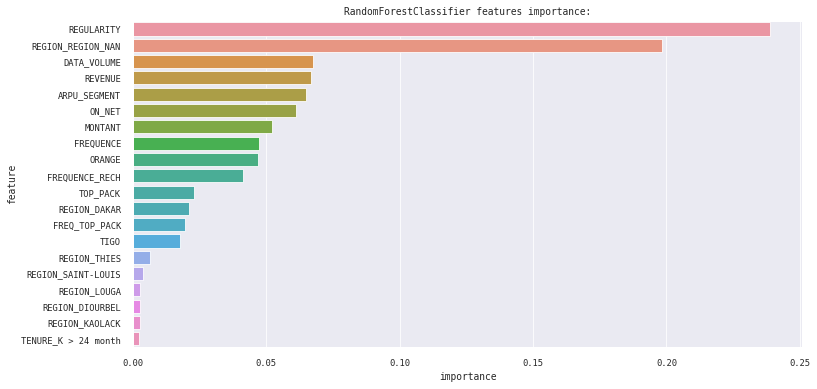

In [43]:
feature_importance_df = pd.DataFrame(rf.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(12, 6));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(20))
plt.title('RandomForestClassifier features importance:');

#### GradientBoostingClassifier

In [44]:
# feature_importance_df = pd.DataFrame(rf.feature_importances_, columns=['importance'])
# feature_importance_df['feature'] = X.columns

# plt.figure(figsize=(12, 6));
# sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(20))
# plt.title('RandomForestClassifier features importance:');

### Predicting on the test set and Making Submission on zindi.

In [45]:
test_x = test_df.drop('CHURN', axis = 1)

In [46]:
prediction = gbm.predict_proba(test_x)[:, 1]

In [128]:
sub['CHURN'] = prediction
sub.to_csv('submission.csv', index =False)